<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li><li><span><a href="#Модель-RandomForestRegressor" data-toc-modified-id="Модель-RandomForestRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель RandomForestRegressor</a></span></li><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для этого нужно использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Для достижения цели необходимо выполнить следующие задачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
def data_analyse(data):
    print('Количество параметров и объектов', data.shape)
    print('Количество дубликатов в датасете', data.duplicated().sum())
    print('Количество пропусков в датасете', data.isna().sum().sum())
    

In [4]:
data_analyse(data)
print('--------------------------------------')
data_analyse(train_data)
print('--------------------------------------')
data_analyse(test_data)

Количество параметров и объектов (19439, 87)
Количество дубликатов в датасете 0
Количество пропусков в датасете 4481
--------------------------------------
Количество параметров и объектов (14149, 87)
Количество дубликатов в датасете 0
Количество пропусков в датасете 4100
--------------------------------------
Количество параметров и объектов (5290, 53)
Количество дубликатов в датасете 0
Количество пропусков в датасете 90


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


В данных были обнаружены многочисленные в совокупности пропуски (больше 10% от общего числа данных). В тестовой выборке, как минимум, отсутствуют данные финальных характеристик.

Для удобства переведём тип данных в столбце 'date' из object в datetime:

In [7]:
for i in [train_data, test_data, data]:
    i['date'] = pd.to_datetime(i['date'], format='%Y-%m-%d %H:%M:%S')
    print(i['date'].dtypes, '\n--------------')

datetime64[ns] 
--------------
datetime64[ns] 
--------------
datetime64[ns] 
--------------


Узнаем причину пропуска в данных:

In [8]:
data[data.isna().any(axis=1)].head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,2016-01-17 00:00:00,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,2016-01-17 02:00:00,8.162896,8.877528,NaN,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929
65,2016-01-17 19:00:00,5.976553,10.996561,NaN,43.523390,62.514075,11.439665,1.255373,9.235768,2.770570,...,14.000420,-550.369289,11.993860,-550.801872,10.019677,-502.134984,8.028135,-500.026321,11.999417,-601.306527
66,2016-01-17 20:00:00,5.849873,10.630010,NaN,43.582899,61.819261,11.415898,1.373004,9.696283,2.816412,...,14.017045,-549.905281,12.002873,-550.416734,9.960796,-497.271602,8.028384,-499.558407,11.978157,-598.788524
67,2016-01-17 21:00:00,5.608075,10.683667,NaN,44.966499,63.767242,11.462566,1.413849,10.764420,2.755172,...,14.038568,-549.818311,11.972607,-550.311739,10.074953,-500.657987,7.974807,-500.155945,11.985006,-600.107206
72,2016-01-18 02:00:00,4.537821,11.108789,4.964392,44.631736,72.825821,10.188482,1.410536,20.955075,2.238369,...,14.064474,-551.573603,11.974107,-550.699412,10.028196,-500.331171,8.072443,-499.359611,11.973959,-600.580952
96,2016-01-19 02:00:00,2.660271,6.020833,2.339234,27.097386,58.017871,5.640190,0.865842,7.574660,1.505868,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
97,2016-01-20 16:00:00,6.641615,8.990178,NaN,44.161305,64.045287,12.460954,1.905541,4.360854,3.075640,...,13.977521,-550.386614,12.000013,-550.451984,9.963179,-500.873518,8.051530,-499.780601,11.956762,-599.938457
98,2016-01-20 17:00:00,6.583268,9.204989,NaN,44.480794,49.836467,12.312460,1.751168,3.777035,2.938621,...,14.055718,-549.694176,12.005398,-550.660760,10.019514,-501.677694,8.123011,-499.966297,11.995185,-601.176360


Можно заметить, что пропуски отсутствую в близких по времени данных ('date'), а в условии задачи сказано, что соседние по времени параметры часто похожи. В соответствие с этим, заполним пропуски близкими по времени данными (с каждым индексом время гармонически увеличивается):

In [9]:
for i in [train_data, test_data, data]:
    i = i.fillna(method='ffill')
    print('Количество пропусков в датасете:', i.isna().sum().sum(), '\n------------------------------------')

Количество пропусков в датасете: 0 
------------------------------------
Количество пропусков в датасете: 0 
------------------------------------
Количество пропусков в датасете: 0 
------------------------------------


In [10]:
data = data.fillna(method='ffill')
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')

Проверим, что эффективность обогащения рассчитана правильно:

In [11]:
C = train_data['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
F = train_data['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки
T = train_data['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки

recovery = ((C*(F-T))/(F*(C-T)))*100

print('MAE:', mean_absolute_error(train_data['rougher.output.recovery'], recovery))

MAE: 9.73512347450521e-15


MAE показывает, как сильно предсказания (в нашем случае, это данные из train_data['rougher.output.recovery']) в среднем отличаются от истинных значений (рассчитанные по формуле). Значение MAE крайне мало, что свидетельствует о том, что рассчёты эффективности обогащения верны

In [12]:
print('Отсутствующие признаки в тестовой выборке:')
inaccessible_signs = [] 

for i in list(data.columns):
    if i not in list(test_data.columns):
        inaccessible_signs.append(i)
    
inaccessible_signs

Отсутствующие признаки в тестовой выборке:


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [13]:
final_signs = []
primary_signs = []
rougher_signs = []
secondary_signs = []

for i in inaccessible_signs:
    if 'final' in i:
        final_signs.append(i.split('.')[2])
    if 'primary' in i:
        primary_signs.append(i.split('.')[2])
    if 'rougher' in i:
        rougher_signs.append(i.split('.')[2])
    if 'secondary' in i:
        secondary_signs.append(i.split('.')[2])

print('Для этапа "Финальные характеристики" типа "параметры продукта" отсутствуют значения:', '\n', final_signs, '\n','-'*115)
print('Для этапа "Первичная очистка" типа "параметры продукта" отсутствуют значения:', '\n', primary_signs, '\n','-'*115)
print('Для этапа "Флотация" типа "параметры продукта" отсутствуют значения:', '\n', rougher_signs[4:], '\n','-'*115)
print('Для этапа "Флотация" типа "расчётные характеристики" отсутствуют значения:', '\n', rougher_signs[0:4], '\n','-'*115)
print('Для этапа "Вторичная очистка" типа "параметры продукта" отсутствуют значения:', '\n', secondary_signs)

Для этапа "Финальные характеристики" типа "параметры продукта" отсутствуют значения: 
 ['concentrate_ag', 'concentrate_pb', 'concentrate_sol', 'concentrate_au', 'recovery', 'tail_ag', 'tail_pb', 'tail_sol', 'tail_au'] 
 -------------------------------------------------------------------------------------------------------------------
Для этапа "Первичная очистка" типа "параметры продукта" отсутствуют значения: 
 ['concentrate_ag', 'concentrate_pb', 'concentrate_sol', 'concentrate_au', 'tail_ag', 'tail_pb', 'tail_sol', 'tail_au'] 
 -------------------------------------------------------------------------------------------------------------------
Для этапа "Флотация" типа "параметры продукта" отсутствуют значения: 
 ['concentrate_ag', 'concentrate_pb', 'concentrate_sol', 'concentrate_au', 'recovery', 'tail_ag', 'tail_pb', 'tail_sol', 'tail_au'] 
 -------------------------------------------------------------------------------------------------------------------
Для этапа "Флотация" типа "

Добавим целевые признаки для тестовой выборки, без которых модели нечего будет предсказывать. Признаки возьмём из исходного полного датафрейма:

In [14]:
test_data = test_data.merge(data.loc[:, ['date','final.output.recovery', 'rougher.output.recovery']], on='date')

## Анализ данных

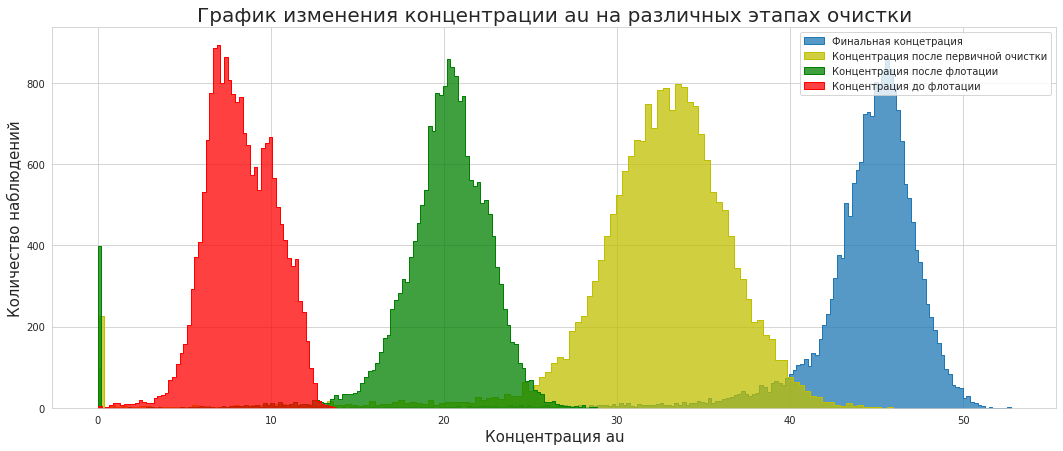

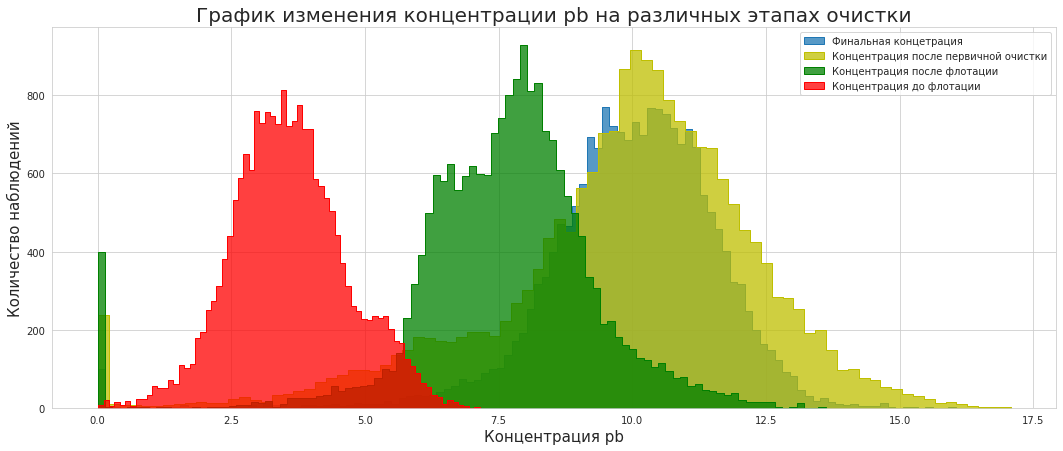

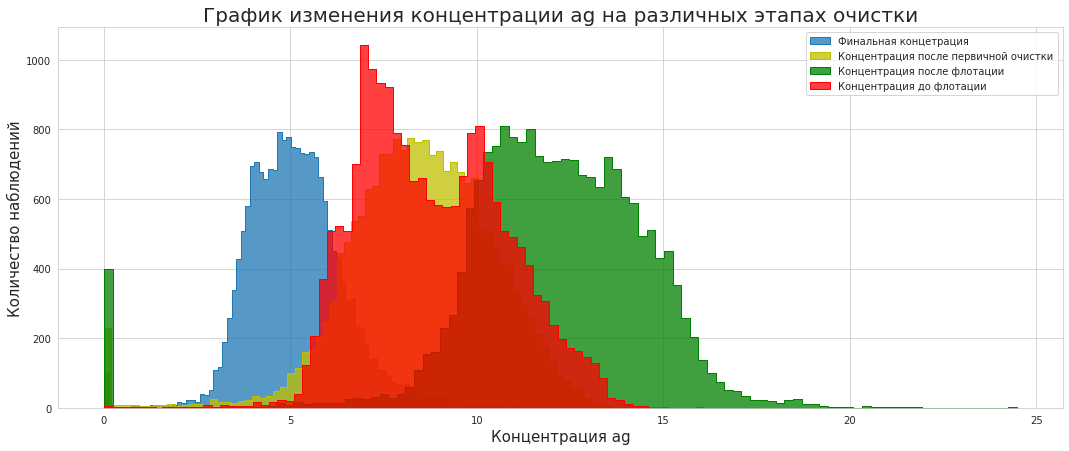

In [15]:
for i in ['au', 'pb', 'ag']:
    sns.set_style('whitegrid')
    plt.figure(figsize=[18, 7])
    plt.title(f'График изменения концентрации {i} на различных этапах очистки', fontsize=20)
    sns.histplot(data[f'final.output.concentrate_{i}'], label='Финальная концетрация', element='step')
    sns.histplot(data[f'primary_cleaner.output.concentrate_{i}'], color='y', label='Концентрация после первичной очистки', element='step')
    sns.histplot(data[f'rougher.output.concentrate_{i}'], color='g', label='Концентрация после флотации', element='step')
    sns.histplot(data[f'rougher.input.feed_{i}'], color='r', label='Концентрация до флотации', element='step')
    plt.xlabel(f'Концентрация {i}', fontsize=15)
    plt.ylabel('Количество наблюдений', fontsize=15)
    plt.legend()
    plt.show()

На графиках для каждого металла прослеживаются следующие характерные моменты:

- С каждым последующим этапом очистки концентрация Au в золотоносной руде увеличивается, что отображает суть процесса;
- С каждым последующим этапом очистки концентрация Pb в золотоносной руде увеличивается, но на финальном этапе концентрация остаётся на уровне первичной очистки (вторичная очистка не влияет на концентрацию Pb);
- В результате всех этапов, концентрация Ag уменьшается по сравнению с начальной концентрации в золотоносной руде;
- Иногда концентрация веществ после фотации и первичной очистки падает до нуля. При рассмотрении гистограммы с концентрациями золота, такое явление похоже на аномалию

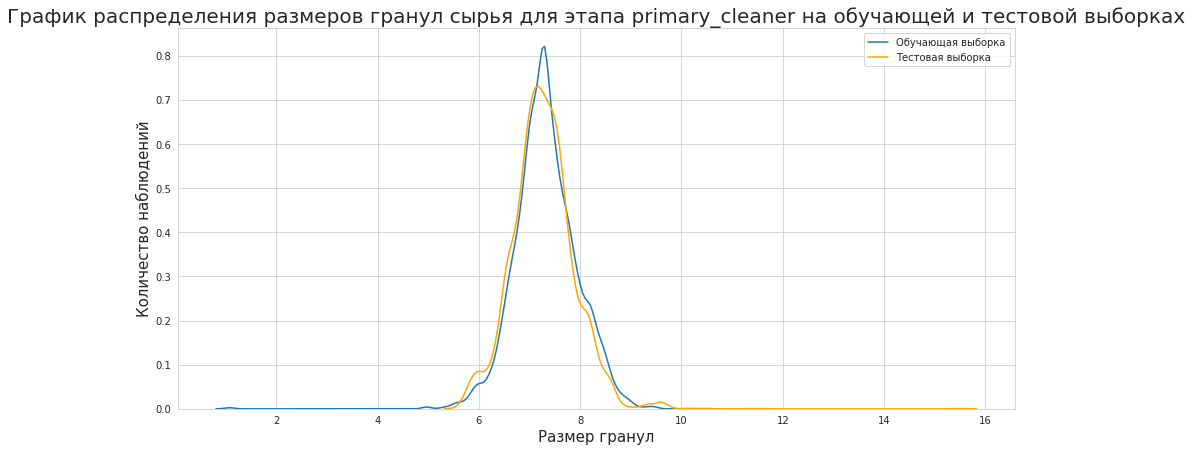

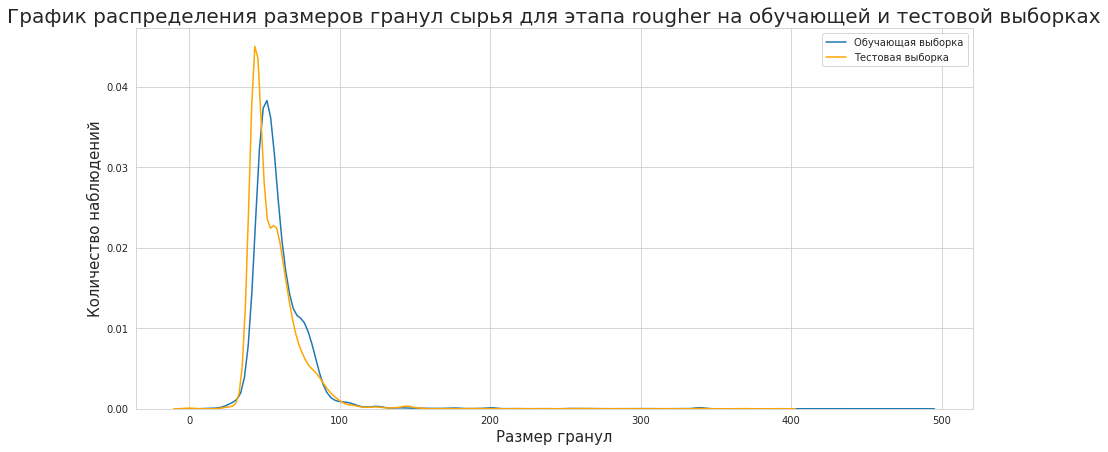

In [16]:
for i in ['primary_cleaner', 'rougher']:
    sns.set_style('whitegrid')
    plt.figure(figsize=[15, 7])
    plt.title(f'График распределения размеров гранул сырья для этапа {i} на обучающей и тестовой выборках', fontsize=20)
    sns.kdeplot(train_data[f'{i}.input.feed_size'], label='Обучающая выборка')
    sns.kdeplot(test_data[f'{i}.input.feed_size'], color='orange', label='Тестовая выборка')
    plt.xlabel(f'Размер гранул', fontsize=15)
    plt.ylabel('Количество наблюдений', fontsize=15)
    plt.legend()
    plt.show()

Несмотря на то, что у обучающей выборки, в целом, наблюдается большее количество наблюдений, значимых различий между распределениями размеров гранул сырья на обучающей и тестовой выборках не было выявлено

In [17]:
concentration_rougher_input = 0
concentration_rougher_output = 0
concentration_final_output = 0
concentration_primary_cleaner_output = 0

for i in ['au', 'pb', 'ag', 'sol']:
    concentration_final_output += data[f'final.output.concentrate_{i}']
    concentration_primary_cleaner_output += data[f'primary_cleaner.output.concentrate_{i}']
    concentration_rougher_output += data[f'rougher.output.concentrate_{i}']
    concentration_rougher_input += data[f'rougher.input.feed_{i}'] 

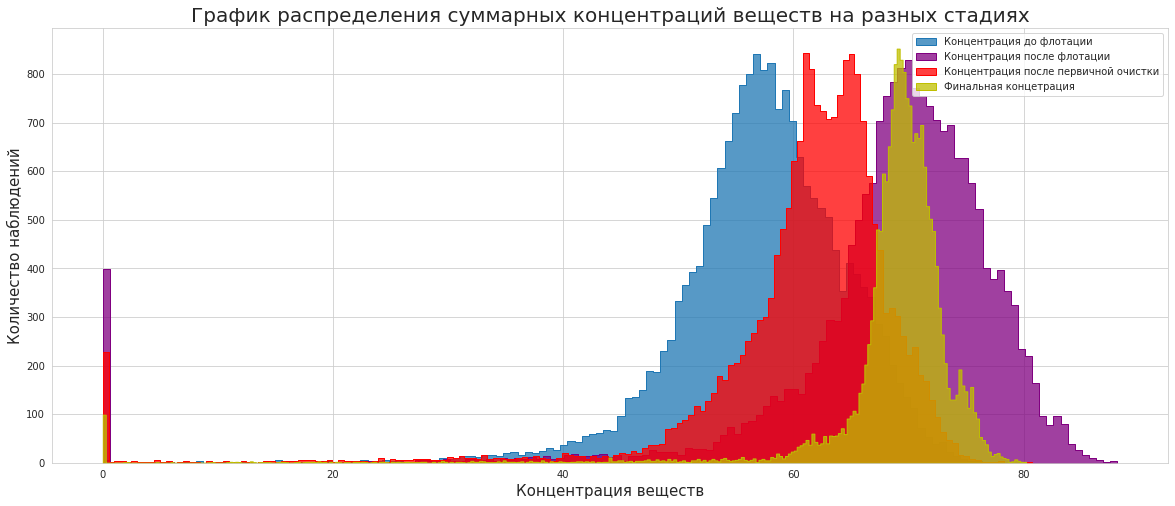

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=[20, 8])
plt.title('График распределения суммарных концентраций веществ на разных стадиях', fontsize=20)
sns.histplot(concentration_rougher_input, label='Концентрация до флотации', element='step',)
sns.histplot(concentration_rougher_output, color='purple', label='Концентрация после флотации', element='step')
sns.histplot(concentration_primary_cleaner_output, color='r', label='Концентрация после первичной очистки', element='step')
sns.histplot(concentration_final_output, color='y', label='Финальная концетрация', element='step')
plt.xlabel('Концентрация веществ', fontsize=15)
plt.ylabel('Количество наблюдений', fontsize=15)
plt.legend()
plt.show()

In [19]:
print('Количество данных с нулевой концентрацией всех веществ (после флотации):', len(data[(data['rougher.output.concentrate_au'] == 0) & (data['rougher.output.concentrate_pb'] == 0) & (data['rougher.output.concentrate_ag'] == 0) & (data['rougher.output.concentrate_sol'] == 0)]))
print('Количество данных с нулевой концентрацией всех веществ (финальный этап):', len(data[(data['final.output.concentrate_au'] == 0) & (data['final.output.concentrate_pb'] == 0) & (data['final.output.concentrate_ag'] == 0) & (data['final.output.concentrate_sol'] == 0)]))
print('Количество данных с нулевой концентрацией всех веществ (после первичной обработки):', len(data[(data['primary_cleaner.output.concentrate_au'] == 0) & (data['primary_cleaner.output.concentrate_pb'] == 0) & (data['primary_cleaner.output.concentrate_ag'] == 0) & (data['primary_cleaner.output.concentrate_sol'] == 0)]))

Количество данных с нулевой концентрацией всех веществ (после флотации): 394
Количество данных с нулевой концентрацией всех веществ (финальный этап): 98
Количество данных с нулевой концентрацией всех веществ (после первичной обработки): 108


На последней гистаграмме, а также на гистограммах с концентрацией каждого металла (au, pb, ag) заметны выбросы. Незначительную часть аномальных данных (меньше 10% от всех данных) мы уберём, чтобы избежать обучения моделей на недостоверных значениях признаков:

In [20]:
data = data[(data['rougher.output.concentrate_au'] != 0) & (data['rougher.output.concentrate_pb'] != 0) & (data['rougher.output.concentrate_ag'] != 0) & (data['rougher.output.concentrate_sol'] != 0)]
data = data[(data['final.output.concentrate_au'] != 0) & (data['final.output.concentrate_pb'] != 0) & (data['final.output.concentrate_ag'] != 0) & (data['final.output.concentrate_sol'] != 0)]
data = data[(data['primary_cleaner.output.concentrate_au'] != 0) & (data['primary_cleaner.output.concentrate_pb'] != 0) & (data['primary_cleaner.output.concentrate_ag'] != 0) & (data['primary_cleaner.output.concentrate_sol'] != 0)]

train_data = train_data[(train_data['rougher.output.concentrate_au'] != 0) & (train_data['rougher.output.concentrate_pb'] != 0) & (train_data['rougher.output.concentrate_ag'] != 0) & (train_data['rougher.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['final.output.concentrate_au'] != 0) & (train_data['final.output.concentrate_pb'] != 0) & (train_data['final.output.concentrate_ag'] != 0) & (train_data['final.output.concentrate_sol'] != 0)]
train_data = train_data[(train_data['primary_cleaner.output.concentrate_au'] != 0) & (train_data['primary_cleaner.output.concentrate_pb'] != 0) & (train_data['primary_cleaner.output.concentrate_ag'] != 0) & (train_data['primary_cleaner.output.concentrate_sol'] != 0)]

In [21]:
print('Количество данных с нулевой концентрацией всех веществ (после флотации):', len(data[(data['rougher.output.concentrate_au'] == 0) & (data['rougher.output.concentrate_pb'] == 0) & (data['rougher.output.concentrate_ag'] == 0) & (data['rougher.output.concentrate_sol'] == 0)]))
print('Количество данных с нулевой концентрацией всех веществ (финальный этап):', len(data[(data['final.output.concentrate_au'] == 0) & (data['final.output.concentrate_pb'] == 0) & (data['final.output.concentrate_ag'] == 0) & (data['final.output.concentrate_sol'] == 0)]))
print('Количество данных с нулевой концентрацией всех веществ (после первичной обработки):', len(data[(data['primary_cleaner.output.concentrate_au'] == 0) & (data['primary_cleaner.output.concentrate_pb'] == 0) & (data['primary_cleaner.output.concentrate_ag'] == 0) & (data['primary_cleaner.output.concentrate_sol'] == 0)]))

Количество данных с нулевой концентрацией всех веществ (после флотации): 0
Количество данных с нулевой концентрацией всех веществ (финальный этап): 0
Количество данных с нулевой концентрацией всех веществ (после первичной обработки): 0


## Модель

In [22]:
def sMAPE(target, prediction):
    sMAPE_result = (1/len(target))*sum((abs(target - prediction))/( (abs(target)+abs(prediction))/2))*100
    return sMAPE_result

In [23]:
sMAPE_scoring = make_scorer(sMAPE, greater_is_better=False)

In [24]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    final_sMAPE_result = 0.25*sMAPE_rougher+0.75*sMAPE_final
    return final_sMAPE_result

In [25]:
target_signs = set(inaccessible_signs)-set(['final.output.recovery', 'rougher.output.recovery'])
train_data = train_data.drop(columns=target_signs, axis=1)

In [26]:
train_data = train_data.drop('date', axis=1)

features = train_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher = train_data['rougher.output.recovery']
target_final = train_data['final.output.recovery']

### Модель DecisionTreeRegressor

In [27]:
%%time
best_result = 100
best_depth = 0

for depth in range(1, 10):
    model_rougher = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    scores_rougher = cross_val_score(model_rougher, features, target_rougher, scoring=sMAPE_scoring, cv=5)
    sMAPE_rougher = scores_rougher.mean()
        
    model_final = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    scores_final = cross_val_score(model_final, features, target_final, scoring=sMAPE_scoring, cv=5)
    sMAPE_final = scores_final.mean()
        
    true_result = final_sMAPE(sMAPE_rougher, sMAPE_final)*(-1)
    if true_result < best_result:
        best_result = true_result
        best_depth = depth

CPU times: user 22.6 s, sys: 7.13 ms, total: 22.6 s
Wall time: 22.6 s


In [41]:
print("sMAPE наилучшей модели на тренировочной  выборке:", best_result, "Максимальная глубина:", best_depth)

sMAPE наилучшей модели на тренировочной  выборке: 8.894948412843098 Максимальная глубина: 3


### Модель RandomForestRegressor

In [28]:
%%time
best_result = 100
best_depth = 0

for est in range(10, 100, 10):
    for depth in range(1, 10):
        model_rougher = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
        scores_rougher = cross_val_score(model_rougher, features, target_rougher, scoring=sMAPE_scoring, cv=5)
        sMAPE_rougher = scores_rougher.mean()
        
        model_final = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
        scores_final = cross_val_score(model_final, features, target_final, scoring=sMAPE_scoring, cv=5)
        sMAPE_final = scores_final.mean()
        
        true_result = final_sMAPE(sMAPE_rougher, sMAPE_final)*(-1)
        if true_result < best_result:
            best_result = true_result
            best_depth = depth
            best_est = est

CPU times: user 1h 38min 53s, sys: 10.5 s, total: 1h 39min 3s
Wall time: 1h 39min 9s


In [47]:
print("sMAPE наилучшей модели на тренировочной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

sMAPE наилучшей модели на тренировочной выборке: 8.41054222202701 Количество деревьев: 40 Максимальная глубина: 4


### Модель LinearRegression

In [42]:
%%time
model_rougher = LinearRegression()
scores_rougher = cross_val_score(model_rougher, features, target_rougher, scoring=sMAPE_scoring, cv=5)
sMAPE_rougher = scores_rougher.mean()
        
model_final = LinearRegression()
scores_final = cross_val_score(model_final, features, target_final, scoring=sMAPE_scoring, cv=5)
sMAPE_final = scores_final.mean()

true_result = final_sMAPE(sMAPE_rougher, sMAPE_final)*(-1)

CPU times: user 1.29 s, sys: 1.22 s, total: 2.51 s
Wall time: 2.44 s


In [43]:
print("sMAPE на тренировочной выборке:", true_result)

sMAPE на тренировочной выборке: 10.02312452485542


Лучшей моделью оказалась RandomForestRegressor с гиперпараметрами: количество деревьев: 40, максимальная глубина: 4

In [26]:
test_data = test_data.drop('date', axis=1)
train_data = train_data.drop('date', axis=1)

features_fit = train_data.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
features_predict = test_data.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

target_rougher_train = train_data['rougher.output.recovery']
target_final_train = train_data['final.output.recovery']
target_rougher_test = test_data['rougher.output.recovery']
target_final_test = test_data['final.output.recovery']

In [27]:
model_rougher = RandomForestRegressor(n_estimators=40, max_depth=4, random_state=12345)
model_rougher.fit(features_fit, target_rougher_train)
prediction_rougher = model_rougher.predict(features_predict)
        
model_final = RandomForestRegressor(n_estimators=40, max_depth=4, random_state=12345)
model_final.fit(features_fit, target_final_train)
prediction_final = model_final.predict(features_predict)
        
sMAPE_rougher = sMAPE(target_rougher_test, prediction_rougher)
sMAPE_final = sMAPE(target_final_test, prediction_final)
result = final_sMAPE(sMAPE_rougher, sMAPE_final)

In [28]:
print("sMAPE на тестовой выборке:", result)

sMAPE на тестовой выборке: 9.408783788062468


Проверим выбранную нами лучшую модель на адекватность:

In [26]:
features = train_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher = train_data['rougher.output.recovery']
target_final = train_data['final.output.recovery']

In [38]:
dummy_reg_rougher = DummyRegressor(strategy="mean")
dummy_reg_final = DummyRegressor(strategy="mean")

dummy_reg_rougher.fit(features, target_rougher)
dummy_reg_final.fit(features, target_final)
prediction_rougher = dummy_reg_rougher.predict(features)
prediction_final = dummy_reg_final.predict(features)

sMAPE_rougher = sMAPE(target_rougher, prediction_rougher)
sMAPE_final = sMAPE(target_final, prediction_final)

final_result = final_sMAPE(sMAPE_rougher, sMAPE_final)
final_result

9.476528227933201

Результат работы DummyRegressor почти равен результату работы нашей модели, что говорит о хорошем уровне качестве нашей модели

## Вывод:

Полученные данные подверглись обработки для обеспечения возможности модели адекватно работать с признаками. Подробнее шаги были описаны в п.1

Затем был проведён анализ данных, в результате которого была обозначена возможность дальнейшей работы с данными (данные оказались верными и поддающимися объяснению). Подробнее шаги были описаны в п.2

На последнем этапе на основе эффективно обработанных данных была построена самая эффективная модель RandomForestRegressor с максимально продуктивными гиперпараметрами, а sMAPE на тестовой выборке равняется 9.4, что является лучшим результатом среди остальных моделей. Результат работы DummyRegressor почти равен результату работы нашей модели, что говорит о хорошем уровне качестве нашей модели